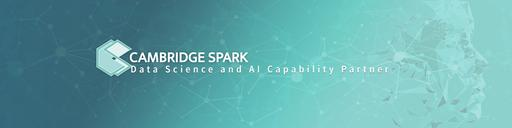

CS Streaming Services

Short introduction:
    The CEO of CS-Streaming has brought you and your team in to analyse Netflix data for their new streaming service. They are confident that your analysis will be helpful to you in making decisions about their service. They need your expertise to uncover trends and insights from the Netflix data that will be beneficial to their new product. They are eager to begin this project and will therefore need a timely response.

The objectives of this project is to analyse the Netflix data in order to:
        
    Identify trends and insights to boost CS-Streaming’s new product
    Report on how CS-Streaming can optimise its services to compete with Netflix


    In order to identify a trend we have looked at how profitable the company has been along the years. According to Statista, the Netflix revenue has been pretty much flat from 2010 up untill the end of 2017, therefore we will only consider the data after 2018.

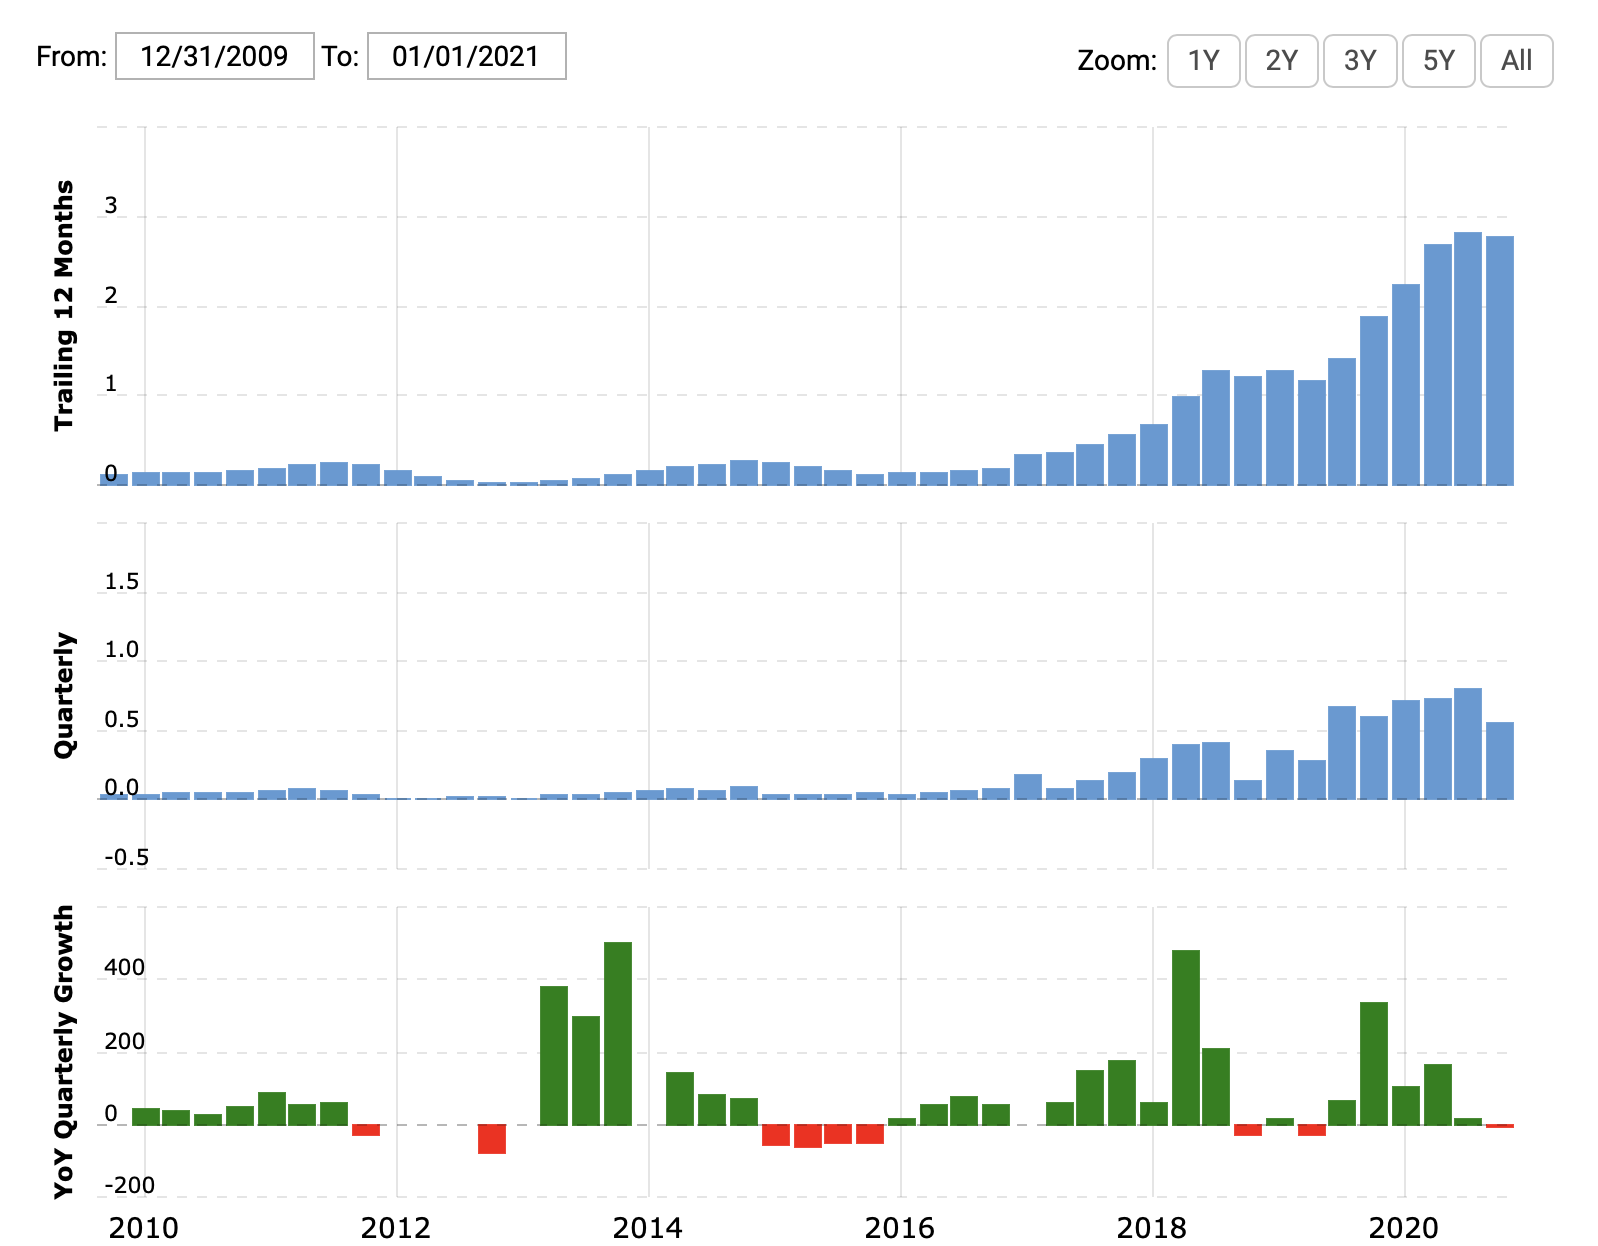

In [ ]:
#First step in the process is to import the packages we are going to work with.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [ ]:
#We then have to import and analyse the data for inconsistencies and formatting.

In [2]:
df = pd.read_csv('/Users/alexandermanta/Downloads/netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Formatting the dataframe

In [7]:
#From the data inspected, we can notice the dae_added column is in a long format, therefore, we should convert it into a more usable format.


df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y') #date to be in format YYYY-MM-DD

In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
#We can then format the release_year to the same format to enable us to perform calculations on the columns.

df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


    A good way to create ratings for a title, is how fast the title has been added on the platform after it has been released from the box office. It take on average 433 day for Netflix to add a title on their platform after it has been released from the box office but that depends a lot on how popular the title is.
    The more popular, the faster it gets added on the platform.

In [ ]:
#Giving the information above, we can create a rating of 'popularity' which will determine how fast a titles has been added on the Netflix.
df['movie_rating'] = df['date_added'] - df['release_year']

In [14]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_rating
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",633 days
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",266 days
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,266 days
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",266 days
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,266 days


In [35]:
#We can then use a plot by spliting the type of titles and grouping the data by years to confirm the hypothesis from above.

Missing values after transformation: 1
NaN values after grouping: type
Movie      0
TV Show    0
dtype: int64


/var/folders/t1/19mjcn6s65x1_r3vk1964d8r0000gn/T/ipykernel_1240/1990237955.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['movie_rating'] = filtered_df['movie_rating'].astype(str).str.extract(r'(\d+)', expand=False).astype(float)


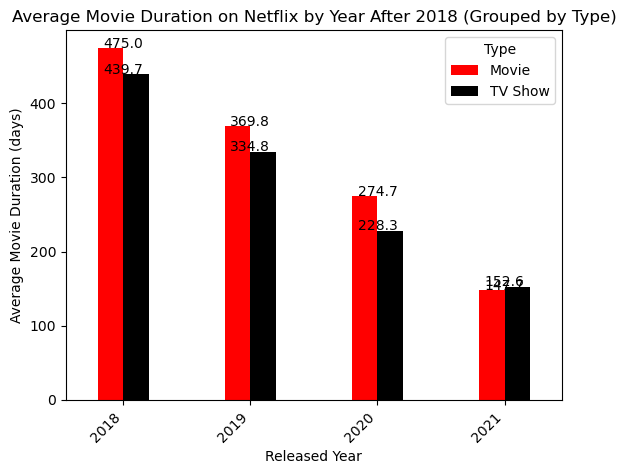

In [20]:
import matplotlib.pyplot as plt

# Filter the DataFrame to consider only data from 2018 onwards
filtered_df = df[df['release_year'].dt.year >= 2018]

# Convert the movie rating column to string and then extract the numeric part if it's a string
filtered_df['movie_rating'] = filtered_df['movie_rating'].astype(str).str.extract(r'(\d+)', expand=False).astype(float)

# Check if there are any missing values after transformation
print("Missing values after transformation:", filtered_df['movie_rating'].isnull().sum())

# Grouping by release_year and type, then calculating the average movie duration for each group
average_durations = filtered_df.groupby([filtered_df['release_year'].dt.year, 'type'])['movie_rating'].mean().unstack()

# Check if there are any NaN values after grouping
print("NaN values after grouping:", average_durations.isnull().sum())

# Plotting
average_durations.plot(kind='bar', width=0.4, color=['red', 'black'])
plt.xlabel('Released Year')
plt.ylabel('Average Movie Duration (days)')
plt.title('Average Movie Duration on Netflix by Year After 2018 (Grouped by Type)')
plt.legend(title='Type')
plt.xticks(rotation=45, ha='right')

# Adding value labels on top of each bar
for i in range(len(average_durations)):
    for j in range(len(average_durations.columns)):
        value = average_durations.iloc[i, j]
        if not pd.isnull(value):  # Check if value is not NaN
            plt.text(i, value + 0.5, f"{value:.1f}", ha='center')

plt.show()


From the chart, we can conclude that it took on average aproximately 500 days for a movie to be added on the platform, however, this process has been drastically reduced by 100 days YoY. #turnaorund column

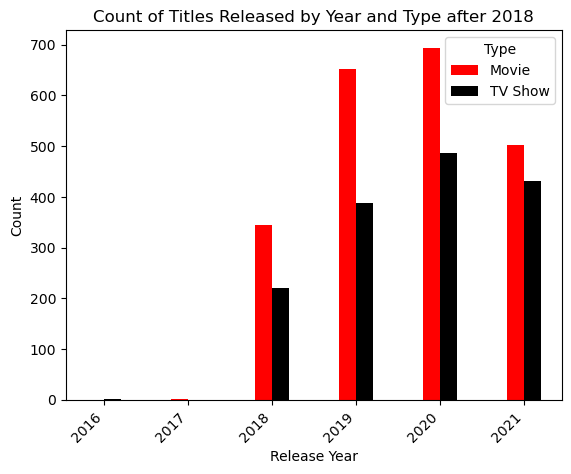

In [28]:
#Futher to our hypothesis, we can look at how many titles have been released per year, since 2018. 

import matplotlib.pyplot as plt

# Assuming df is your DataFrame
filtered_df = df[df['release_year'].dt.year >= 2018]

# Grouping by release_year and type, then counting occurrences
grouped_counts = filtered_df.groupby([filtered_df['date_added'].dt.year, 'type']).size().unstack()

# Plotting
ax = grouped_counts.plot(kind='bar', width=0.4, color=['red', 'black'])

# Extracting the year from the index and converting it to strings
x_labels = [str(index).split('.')[0] for index in grouped_counts.index]

ax.set_xticklabels(x_labels, rotation=45, ha='right')  # Setting the x-axis labels
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Count of Titles Released by Year and Type after 2018')
plt.legend(title='Type')
plt.show()


In [30]:
df.describe()

,date_added,release_year,movie_rating
count,8797,8807,8797
mean,2019-05-17 05:59:08.436967168,2014-03-07 16:27:24.873396224,1895 days 08:49:32.649766944
min,2008-01-01 00:00:00,1925-01-01 00:00:00,-1006 days +00:00:00
25%,2018-04-06 00:00:00,2013-01-01 00:00:00,268 days 00:00:00
50%,2019-07-02 00:00:00,2017-01-01 00:00:00,578 days 00:00:00
75%,2020-08-19 00:00:00,2019-01-01 00:00:00,2069 days 00:00:00
max,2021-09-25 00:00:00,2021-01-01 00:00:00,34331 days 00:00:00
std,NaN,NaN,3210 days 23:18:01.596816512


    A very interesting insight is that while the profit increased, the number of titles have been increased over the years, however, we can see a 15% decreased in 2021 which is not accurate as the data has only been captured until the end of September. That could indicate a rough estimate of 10-15% of missing data.

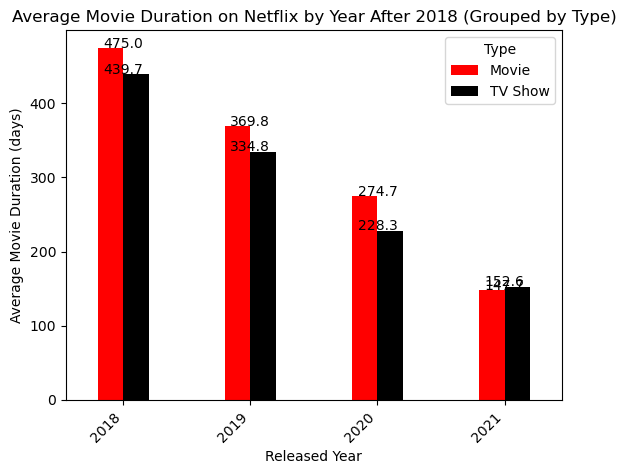

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Filter the DataFrame to consider only data from 2018 onwards
filtered_df = df[df['release_year'].dt.year >= 2018]

# Convert the movie rating column to string and then extract the numeric part if it's a string
filtered_df.loc[:, 'movie_rating'] = filtered_df['movie_rating'].astype(str).str.extract(r'(\d+)', expand=False).astype(float)

# Grouping by release_year and type, then calculating the average movie duration for each group
average_durations = filtered_df.groupby([filtered_df['release_year'].dt.year, 'type'])['movie_rating'].mean().unstack()

# Plotting
average_durations.plot(kind='bar', width=0.4, color=['red', 'black'])
plt.xlabel('Released Year')
plt.ylabel('Average Movie Duration (days)')
plt.title('Average Movie Duration on Netflix by Year After 2018 (Grouped by Type)')
plt.legend(title='Type')
plt.xticks(rotation=45, ha='right')

# Adding value labels on top of each bar
for i in range(len(average_durations)):
    for j in range(len(average_durations.columns)):
        value = average_durations.iloc[i, j]
        if not pd.isnull(value):  # Check if value is not NaN
            plt.text(i, value + 0.5, f"{value:.1f}", ha='center')

plt.show()
